<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>USArrests</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>USArrests</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("USArrests.csv", index_col = 0)
df.head()
df.shape
df.dtypes

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


(50, 4)

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,Murder,Assault,UrbanPop,Rape


(0, 4)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
df.columns = pd.MultiIndex.from_tuples([('quantitative', 'Murder'), ('quantitative', 'Assault'),
                                        ('quantitative', 'UrbanPop'), ('quantitative', 'Rape')],
                                       names=['type of variable', 'variable'])
df.head()

type of variable quantitative                       
variable               Murder Assault UrbanPop  Rape
Alabama                  13.2     236       58  21.2
Alaska                   10.0     263       48  44.5
Arizona                   8.1     294       80  31.0
Arkansas                  8.8     190       50  19.5
California                9.0     276       91  40.6

<p>Now we can create the quantative data quality report.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
'Quantitative Qualilty Report:'
df_qr_quantitative.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
Murder,50,0.0,43,0.8,4.08,7.79,7.25,11.25,17.4,4.36
Assault,50,0.0,45,45.0,109.00,170.76,159.00,249.00,337.0,83.34
UrbanPop,50,0.0,36,32.0,54.50,65.54,66.00,77.75,91.0,14.47
Rape,50,0.0,48,7.3,15.08,21.23,20.10,26.17,46.0,9.37


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> function the produce the frequency plots for each (quantitative) variable.</p>

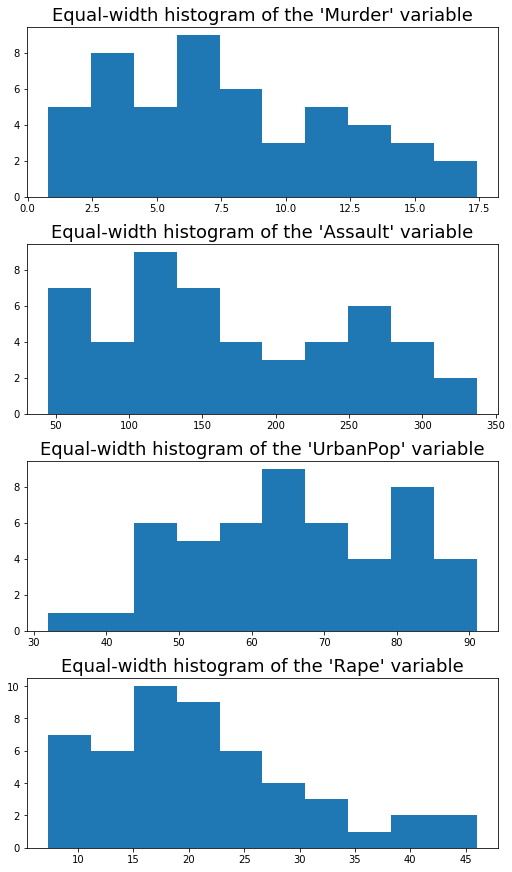

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)